#Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#Importing the dataset

In [ ]:
df=pd.read_csv('online_advertising_performance_data.csv')

# see dataset features uaing head() and tail()

In [ ]:
print(df.head())

   month  day campaign_number user_engagement     banner placement  displays  \
0  April    1          camp 1            High  160 x 600       abc         4   
1  April    1          camp 1            High  160 x 600       def     20170   
2  April    1          camp 1            High  160 x 600       ghi     14701   
3  April    1          camp 1            High  160 x 600       mno    171259   
4  April    1          camp 1             Low  160 x 600       def       552   

       cost  clicks   revenue  post_click_conversions  post_click_sales_amount  
0    0.0060       0    0.0000                       0                   0.0000  
1   26.7824     158   28.9717                      23                1972.4602  
2   27.6304     158   28.9771                      78                2497.2636  
3  216.8750    1796  329.4518                     617               24625.3234  
4    0.0670       1    0.1834                       0                   0.0000  


In [ ]:
print(df.tail())

       month  day campaign_number user_engagement     banner placement  \
15403  April    1          camp 1             Low  160 x 600       ghi   
15404  April    1          camp 1             Low  160 x 600       mno   
15405   June   29          camp 1            High  800 x 250       ghi   
15406   June   29          camp 1            High  800 x 250       mno   
15407   June   29          camp 3            High  240 x 400       def   

       displays    cost  clicks  revenue  post_click_conversions  \
15403        16  0.0249       0   0.0000                       0   
15404      2234  0.4044      10   1.8347                       3   
15405         1  0.0157       0   0.0000                       0   
15406         4  0.0123       0   0.0000                       0   
15407      1209  0.3184       2   0.1115                       3   

       post_click_sales_amount  
15403                   0.0000  
15404                 101.7494  
15405                   0.0000  
15406         

# No. of features and dataset length

In [ ]:
df.shape

(15408, 12)

# Information about datatype, column names and non-null feature length

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB
None


# Missing values in "placement"

@The numerical columns are : Day,displays,cost,clicks,revenue, post click conversion and post click sales amount
@there seems to be only one column with missing values in the dataset i.e. 'placement' with (15408-14995)=413 missing values.

In [ ]:
print(df.isnull().sum())

month                        0
day                          0
campaign_number              0
user_engagement              0
banner                       0
placement                  413
displays                     0
cost                         0
clicks                       0
revenue                      0
post_click_conversions       0
post_click_sales_amount      0
dtype: int64


we will observe the frequency distribution of column: "Placement"

In [ ]:
placement_percentages = df['placement'].value_counts(normalize=True) * 100
print("\nFrequency distribution with percentages:\n")
print(placement_percentages.round(2).astype(str) + " %")



Frequency distribution with percentages:

placement
mno    30.02 %
def    23.59 %
ghi    23.23 %
jkl     16.7 %
abc     6.46 %
Name: proportion, dtype: object


Given the low percentage of missing 'placement' data ((413/15408)*100 = 2.6%) and the presence of a clear mode ('mno'), mode imputation is a reasonable and likely acceptable method for handling the missing values of our 'placement' column

In [ ]:
column_to_fill = 'placement'
mode_value = df[column_to_fill].mode()[0]
print(mode_value)

mno


In [ ]:
df.fillna({'placement':mode_value}, inplace=True)

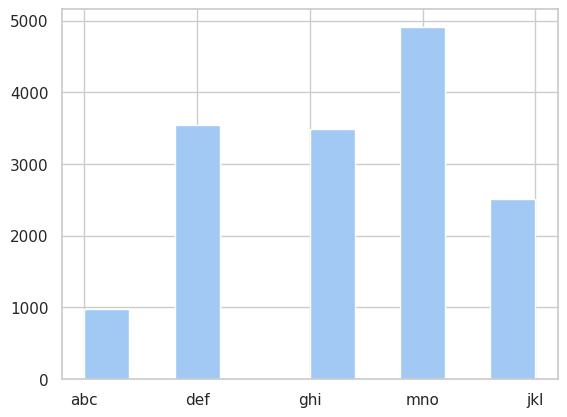

In [ ]:
plt.hist(df['placement'])
plt.show()

Rechecking is all missing values are filled

In [ ]:
print(f"Missing values in '{column_to_fill}' after filling with mode '{mode_value}': {df[column_to_fill].isnull().sum()}")

Missing values in 'placement' after filling with mode 'mno': 0


Checking statistics of the numerical features of our dataset

In [ ]:
print(df.describe())

                day       displays          cost        clicks       revenue  \
count  15408.000000   15408.000000  15408.000000  15408.000000  15408.000000   
mean      15.518886   15512.573014     11.370262    161.788487     17.929943   
std        8.740909   44392.392890     45.369499    728.276911     96.781834   
min        1.000000       0.000000      0.000000      0.000000      0.000000   
25%        8.000000      78.000000      0.024000      0.000000      0.000000   
50%       15.000000    1182.000000      0.339850      6.000000      0.483950   
75%       23.000000    8960.250000      2.536225     53.000000      3.839800   
max       31.000000  455986.000000    556.704800  14566.000000   2096.211600   

       post_click_conversions  post_click_sales_amount  
count            15408.000000             15408.000000  
mean                42.300623              2123.288058  
std                213.685660             10523.029607  
min                  0.000000                 0.000

1. The days range vary from 1 to 31
2. Displays range from no display to 455986 no of displays
3. cost vary from 0 to 556.7048 USD
4. no of clicks are 0 to 14566 clicks
5.  revenue is 0 to 2096.2116 USD
6.  post click conversions are 0 to 3369 clicks
7. post click sales amount is from 0 to 199930.318 USD

Encoding categorical data into numerical representation that a ML model can understand

In [ ]:
for columns in df.columns:
  if df[columns].nunique() < 6:
    print(f"Uniques values in column '{columns}':")
    print(df[columns].unique())

Uniques values in column 'month':
['April' 'May' 'June']
Uniques values in column 'campaign_number':
['camp 1' 'camp 2' 'camp 3']
Uniques values in column 'user_engagement':
['High' 'Low' 'Medium']
Uniques values in column 'placement':
['abc' 'def' 'ghi' 'mno' 'jkl']


In [ ]:
print(df['day'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [ ]:
# Map the month names to numerical values
month_mapping = {'April': 4,'May': 5, 'June': 6}
df['month_num'] = df['month'].map(month_mapping)

#Create the datetime column using the numerical month
df['date'] = pd.to_datetime({'year': 2020, 'month': df['month_num'], 'day': df['day']})

# Drop the temporary month_num column
df = df.drop('month_num', axis=1)

# Converting 'placement' dtype as str
df['placement'] = df['placement'].astype(str)

# Map 'user_engagement' to numerical values
engagement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['user_engagement'] = df['user_engagement'].map(engagement_mapping)

# Map 'campaign_number' to numerical values
campaign_mapping = {'camp 1': 1, 'camp 2': 2, 'camp 3': 3}
df['campaign_number'] = df['campaign_number'].map(campaign_mapping)


We can drop the month and day columns as they can be accessible through:
1. df['month'] = df['date'].dt.month
2. df['day'] = df['date'].dt.day

In [ ]:
df.drop('month', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)

In [ ]:
df.head()

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date
0,1,3,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,2020-04-01
1,1,3,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,2020-04-01
2,1,3,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,2020-04-01
3,1,3,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,2020-04-01
4,1,1,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,2020-04-01


In [ ]:
cols = list(df.columns)
if 'date' in cols:
    cols.remove('date')
    cols.insert(0, 'date')  # move 'date' to the front
df = df[cols]  # reindex DataFrame with new column order
df.head()

,date,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,2020-04-01,1,3,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,2020-04-01,1,3,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,2020-04-01,1,3,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,2020-04-01,1,3,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,2020-04-01,1,1,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


  Now we will visually check all features for distribution

In [ ]:
df.columns

Index(['date', 'campaign_number', 'user_engagement', 'banner', 'placement',
       'displays', 'cost', 'clicks', 'revenue', 'post_click_conversions',
       'post_click_sales_amount'],
      dtype='object')

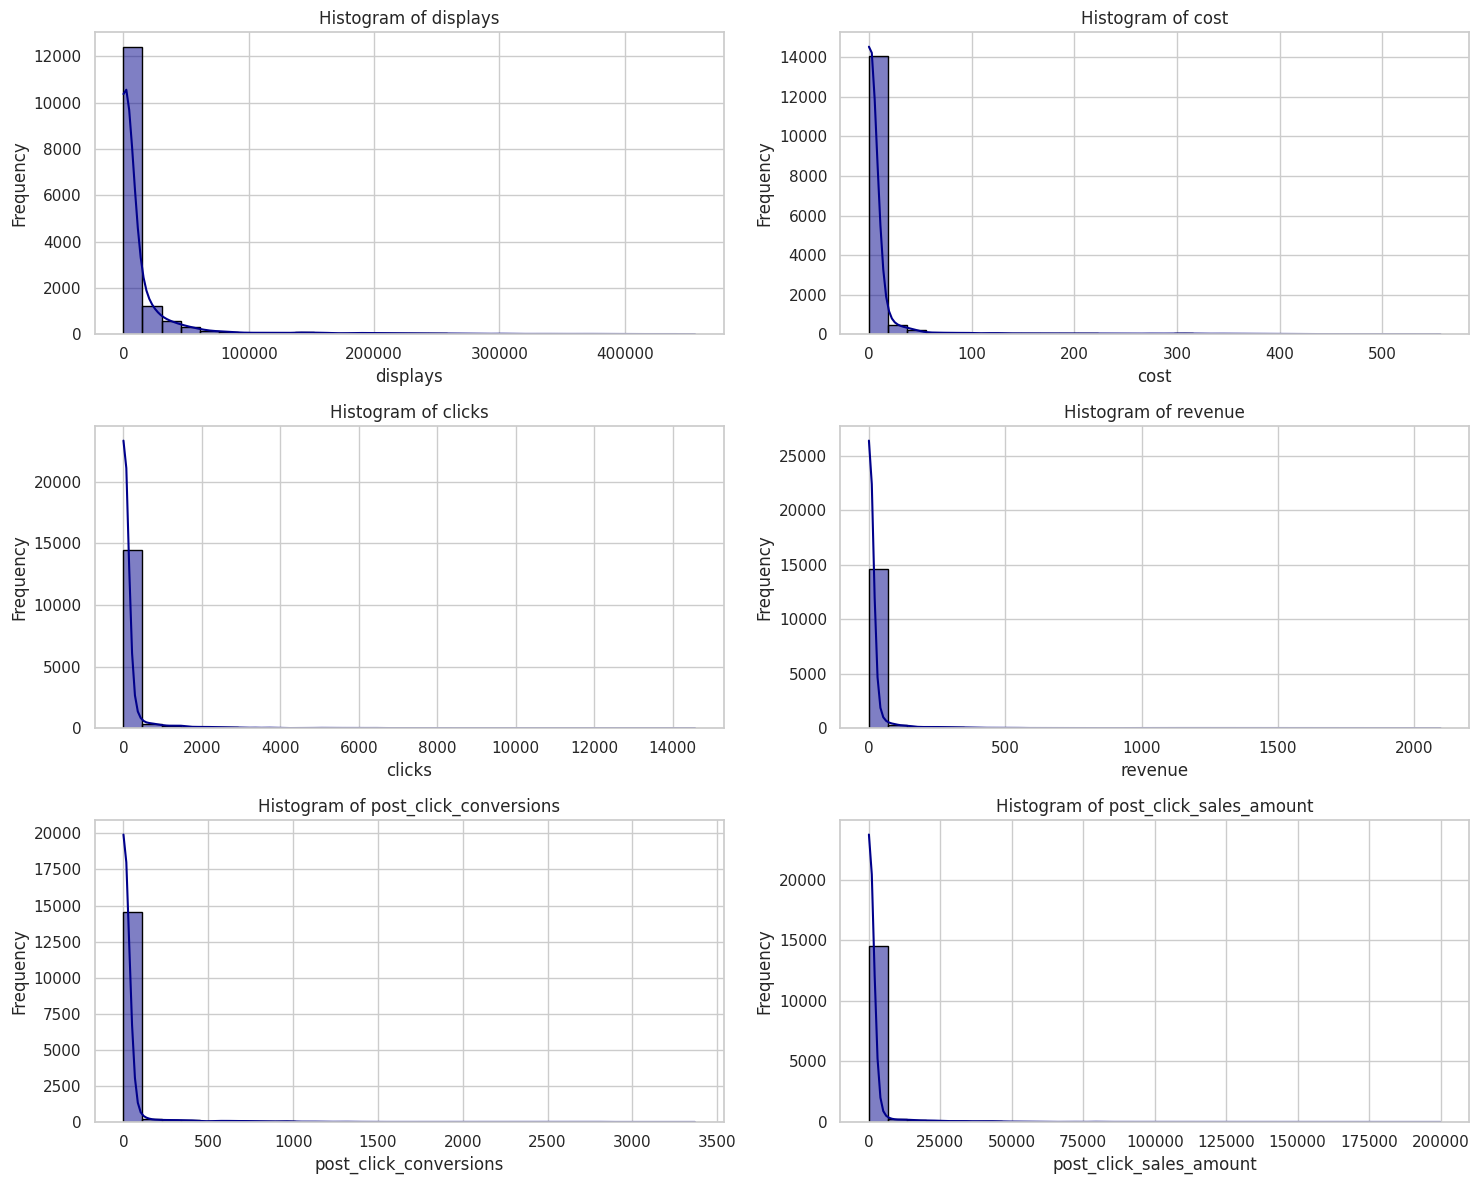

In [ ]:
# List of numeric columns to plot
num_cols = ['displays', 'cost', 'clicks', 'revenue', 'post_click_conversions', 'post_click_sales_amount']

# Set up the figure
plt.figure(figsize=(15, 12))
# Loop through each column and create a subplot
for i, num_col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    sns.histplot(df[num_col], bins=30,kde=True, color='Darkblue', edgecolor='black')
    plt.title(f'Histogram of {num_col}')
    plt.xlabel(num_col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


All of the numerical columns seem to be highly right skewed

In [ ]:
df['displays_log'] = np.log1p(df['displays'])
df['cost_log'] = np.log1p(df['cost'])
df['clicks_log'] = np.log1p(df['clicks'])
df['revenue_log'] = np.log1p(df['revenue'])
df['post_click_conversions_log'] = np.log1p(df['post_click_conversions'])
df['post_click_sales_amount_log'] = np.log1p(df['post_click_sales_amount'])


In [ ]:
# List of numeric columns to plot
new_num_cols = ['displays_log', 'cost_log', 'clicks_log', 'revenue_log', 'post_click_conversions_log', 'post_click_sales_amount_log']

# Count zeros
zero_counts = (df[new_num_cols] == 0).sum()
print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
displays_log                     22
cost_log                         64
clicks_log                     4895
revenue_log                    5101
post_click_conversions_log     9838
post_click_sales_amount_log    9819
dtype: int64


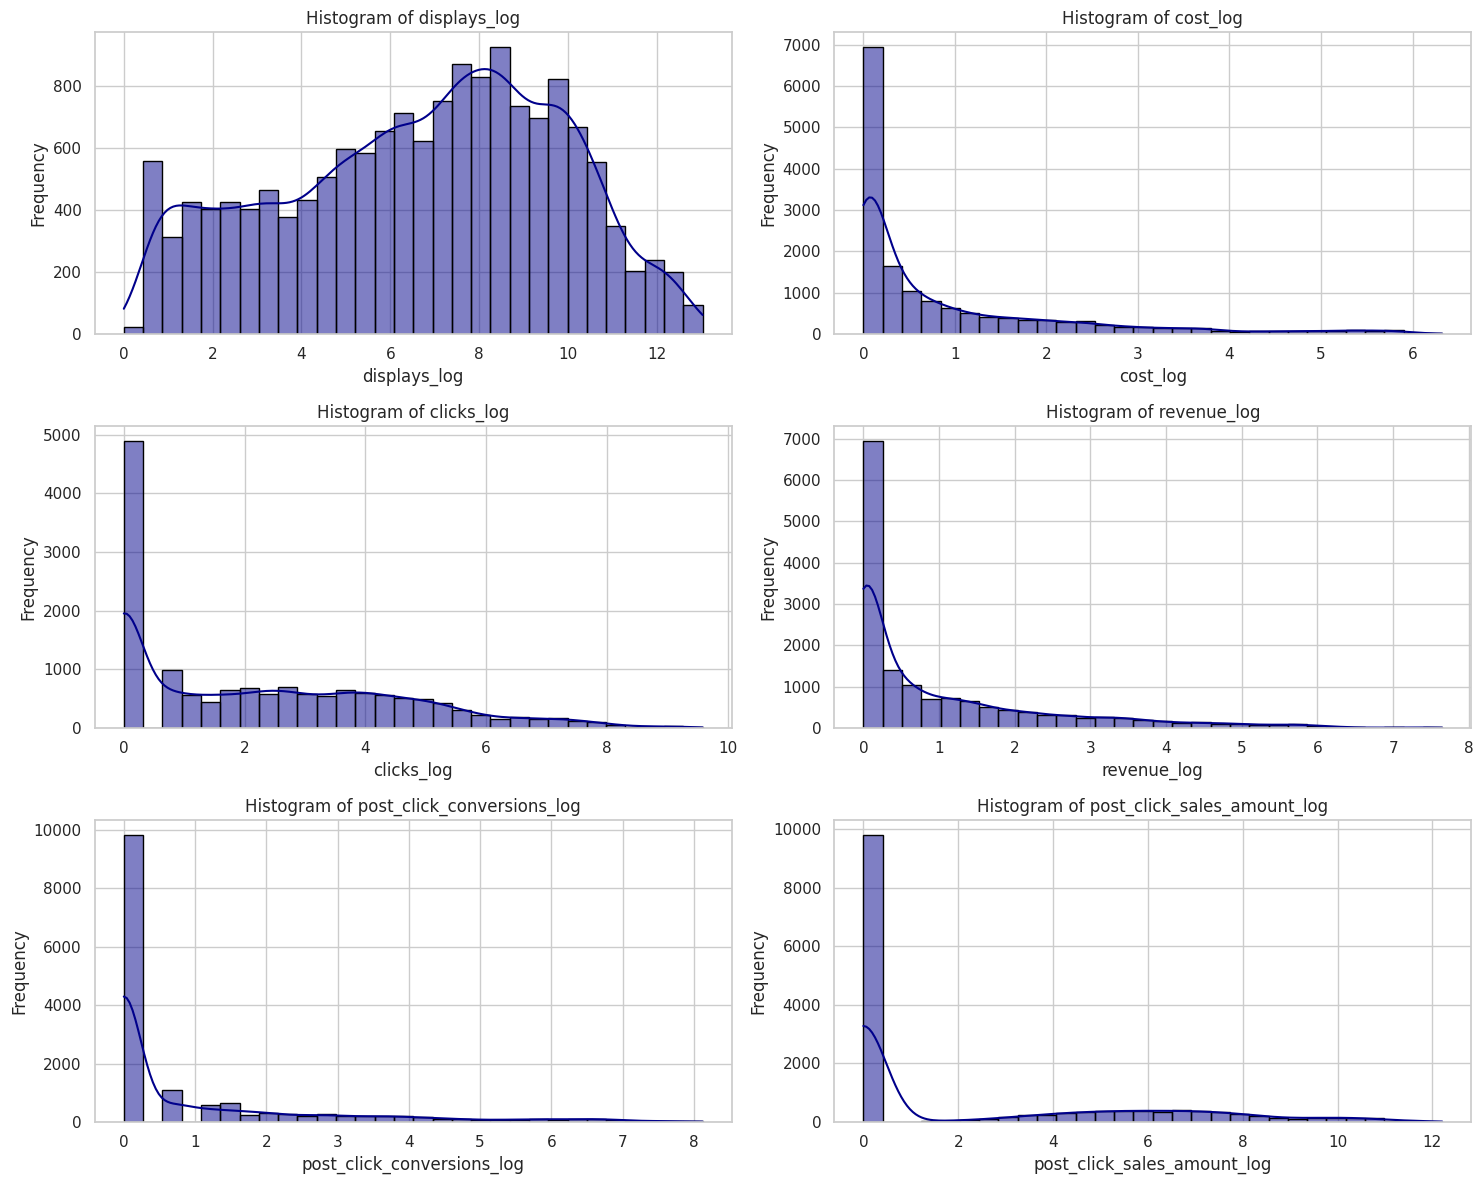

In [ ]:
# Drop rows with NaN in selected columns
columns_to_drop = ['displays_log', 'cost_log']
df = df.dropna(subset=columns_to_drop)

# Plot histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(new_num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=30, kde=True, color='darkblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

We are not dropping values in the original dataset because, as seen the advertising data is sensitive and the null values have a specific meaning that some marketing strategies did not worked well in terms of conversions, clicks etc . Hence, removing them is not advisable.

# Final processed dataset for further analysis

In [ ]:
from google.colab import files

df.to_csv('Final_processed_data.csv', index=False)
files.download('Final_processed_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Using the processed dataset for further insights

In [ ]:
df1=pd.read_csv('Final_processed_data.csv')

In [ ]:
print(df.head())

        date  campaign_number  user_engagement     banner placement  displays  \
0 2020-04-01                1                3  160 x 600       abc         4   
1 2020-04-01                1                3  160 x 600       def     20170   
2 2020-04-01                1                3  160 x 600       ghi     14701   
3 2020-04-01                1                3  160 x 600       mno    171259   
4 2020-04-01                1                1  160 x 600       def       552   

       cost  clicks   revenue  post_click_conversions  \
0    0.0060       0    0.0000                       0   
1   26.7824     158   28.9717                      23   
2   27.6304     158   28.9771                      78   
3  216.8750    1796  329.4518                     617   
4    0.0670       1    0.1834                       0   

   post_click_sales_amount  displays_log  cost_log  clicks_log  revenue_log  \
0                   0.0000      1.609438  0.005982    0.000000     0.000000   
1           

# 1.What is the overall trend in user engagement throughout the campaign period?

In [ ]:
#Importing color map and normalize
import matplotlib.cm as cm
from matplotlib.colors import Normalize

We observe the overall trend in user engagement through two ways for the campaign period:
1. Weekly
2. Monthly


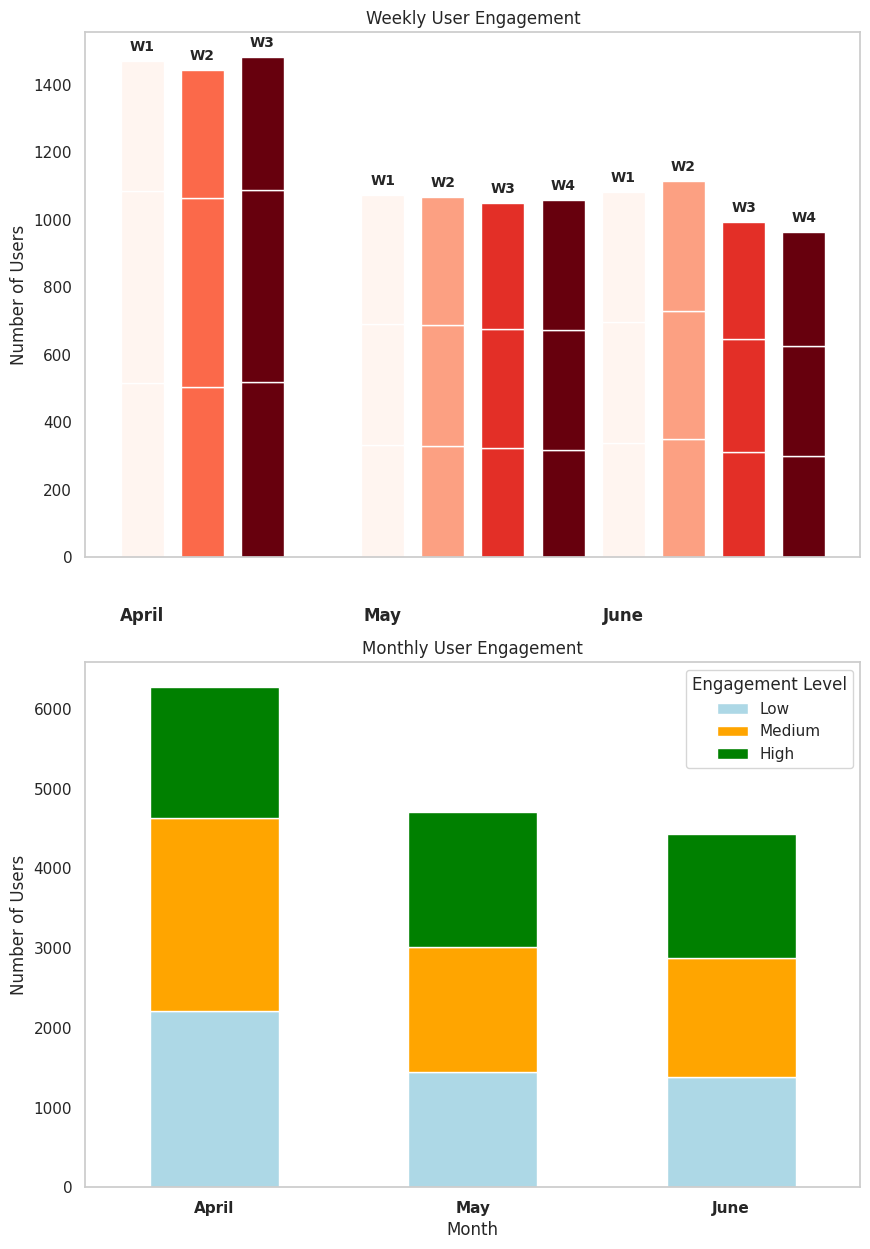

In [ ]:
# Map engagement levels early for clarity
engagement_label_map = {1: 'Low', 2: 'Medium', 3: 'High'}
df1['engagement_label'] = df1['user_engagement'].map(engagement_label_map)
# Convert the 'date' column to datetime type after reading the CSV
df1['date'] = pd.to_datetime(df1['date'])
# Weekly aggregation by engagement type (count)
weekly_engagement = df1.groupby([df1['date'].dt.to_period('W'), 'engagement_label']).size().unstack(fill_value=0)
weekly_engagement.index = weekly_engagement.index.to_timestamp()

#Create week_start and week_end
weeks_df = weekly_engagement.index.to_frame(index=False, name='week_start')
weeks_df['week_end'] = weeks_df['week_start'] + pd.Timedelta(days=6)

#Filter weeks within a single month
weeks_df['start_month'] = weeks_df['week_start'].dt.month
weeks_df['end_month'] = weeks_df['week_end'].dt.month
full_weeks_df = weeks_df[weeks_df['start_month'] == weeks_df['end_month']].copy()

#Filter weekly data to valid weeks only
filtered_weekly_engagement = weekly_engagement[weekly_engagement.index.isin(full_weeks_df['week_start'])]

#Add week number and month name
full_weeks_df['month_name'] = full_weeks_df['week_start'].dt.strftime('%B')
full_weeks_df['week_num_in_month'] = full_weeks_df.groupby('start_month').cumcount() + 1



######################################################################################################################
#######################################################################################################################



#  Monthly aggregation by engagement type (count)
monthly_engagement = df1.groupby([df1['date'].dt.month, 'engagement_label']).size().unstack(fill_value=0)
month_names_mapping = {4: 'April', 5: 'May', 6: 'June'}
monthly_engagement.index = monthly_engagement.index.map(month_names_mapping)


######################################################################################################################
#######################################################################################################################
# plot beautification


# Color map setup for monthly user enagegemnt plot
month_colors = {'April': 'red', 'May': 'green', 'June': 'blue'}
bar_positions = filtered_weekly_engagement.index
week_labels = [f"W{w}" for w in full_weeks_df['week_num_in_month']]


# Gradual red tone for weekly bars corresponding to their respective months for weekly user_engagement plot
colors_by_week = []
for i, row in full_weeks_df.iterrows():
    total_weeks = full_weeks_df[full_weeks_df['start_month'] == row['start_month']]['week_num_in_month'].max()
    norm = Normalize(vmin=1, vmax=total_weeks)
    color = cm.Reds(norm(row['week_num_in_month']))
    colors_by_week.append(color)



######################################################################################################################
#######################################################################################################################



# Plotting weekly monthly and campaign wise as 3 subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

### 1. Weekly Plot
bottom = [0] * len(filtered_weekly_engagement)
for col in ['Low', 'Medium', 'High']:  # ensure order
    axs[0].bar(bar_positions,
               filtered_weekly_engagement[col],
               bottom=bottom,
               width=5,
               label=col,
               color=colors_by_week)
    bottom = [i + j for i, j in zip(bottom, filtered_weekly_engagement[col])]

# Add week labels above bars
for i, (x, height) in enumerate(zip(bar_positions, bottom)):
    axs[0].text(x, height + max(bottom) * 0.02, week_labels[i],
                ha='center', fontsize=10, fontweight='bold')

# Add month names below
month_change_dates = full_weeks_df.groupby('start_month')['week_start'].first().tolist()
for date in month_change_dates:
    row = full_weeks_df[full_weeks_df['week_start'] == date]
    if not row.empty:
        month_name = row['month_name'].values[0]
        axs[0].text(date, -max(bottom) * 0.1, month_name,
                    ha='center', va='top', fontsize=12, fontweight='bold')

axs[0].set_title('Weekly User Engagement')
axs[0].set_ylabel('Number of Users')
axs[0].set_xticks([])
axs[0].grid(False)

### 2. Monthly Plot
monthly_engagement[['Low', 'Medium', 'High']].plot(kind='bar',
                                                   stacked=True,
                                                   color=['lightblue', 'orange', 'green'],
                                                   ax=axs[1])
axs[1].set_title('Monthly User Engagement')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Users')
axs[1].grid(False)
axs[1].set_xticklabels(monthly_engagement.index, rotation=0, fontweight='bold')
axs[1].legend(title='Engagement Level')







# 2. How does the size of the ad (banner) impact the number of clicks generated?

A banner  or ad  might be shown to the user more often than others. hence, we first normalize by dividing it with number of displays.
Terminology:
* CTR: Click-Through Rate(how often people clicked on an ad (or link) after seeing it.)

In [ ]:
banner_ctr = df1.groupby('banner').agg({'clicks': 'sum', 'displays': 'sum'})
banner_ctr['CTR'] = (banner_ctr['clicks'] / banner_ctr['displays'])*100
banner_ctr = banner_ctr.sort_values(by='CTR', ascending=False)
# Printing CTR percentage
banner_ctr['CTR'] = banner_ctr['CTR'].round(2).astype(str) + ' %'
# Creating bold fonts
banner_ctr.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,clicks,displays,CTR
banner,,,
240 x 400,1113256,65783420,1.69 %
580 x 400,120681,7189697,1.68 %
160 x 600,239570,28783853,0.83 %
300 x 250,411214,54838409,0.75 %
728 x 90,569606,76220124,0.75 %
670 x 90,37203,5504972,0.68 %
800 x 250,12,2124,0.56 %
468 x 60,1295,695126,0.19 %


1. Wider banners tend to perform better in terms of number of clicks generated.
2. Higher CTR for 240x400 and 580x400 indicate better clicks and banner visibility for users.
3. While the taller banners seem to perform comparitively low in terms of clicks as seen for 728x90, 670x90, 800x250 and 468x60.

# 3.	Which publisher spaces (placements) yielded the highest number of displays and clicks?

In [ ]:
# Group by placement and sum displays and clicks
placement_stats = df1.groupby('placement')[['displays', 'clicks']].sum()
# Compute CTR: clicks / displays by percentage
placement_stats['CTR'] = (placement_stats['clicks'] / placement_stats['displays'])*100
placement_stats['CTR']=placement_stats['CTR'].round(2).astype(str) + ' %'
# Sort by displays
top_displays = placement_stats.sort_values('displays', ascending=False)
# Sort by clicks
top_clicks = placement_stats.sort_values('clicks', ascending=False)
# Sort by CTR
top_ctr = placement_stats.sort_values('CTR', ascending=False)


Sorted placements by display

In [ ]:
top_displays.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])

,displays,clicks,CTR
placement,,,
mno,143164944,993044,0.69 %
ghi,59740415,1247049,2.09 %
def,28177492,176097,0.62 %
jkl,7692732,75063,0.98 %
abc,242142,1584,0.65 %


Sorted placements by clicks

In [ ]:
top_clicks.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,displays,clicks,CTR
placement,,,
ghi,59740415,1247049,2.09 %
mno,143164944,993044,0.69 %
def,28177492,176097,0.62 %
jkl,7692732,75063,0.98 %
abc,242142,1584,0.65 %


Sorted placements by CTR

In [ ]:
top_ctr.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,displays,clicks,CTR
placement,,,
ghi,59740415,1247049,2.09 %
jkl,7692732,75063,0.98 %
mno,143164944,993044,0.69 %
abc,242142,1584,0.65 %
def,28177492,176097,0.62 %


1. Highest number of displays: 'mno'
2. Highest number of clicks: 'ghi'
3. While the 'ghi' placement has the CTR of 2.09% yeilding the highest clicks per display

# 4.	Is there a correlation between the cost of serving ads and the revenue generated from clicks?

Correlation between cost and revenue: 0.761


/tmp/ipython-input-326-3402667066.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


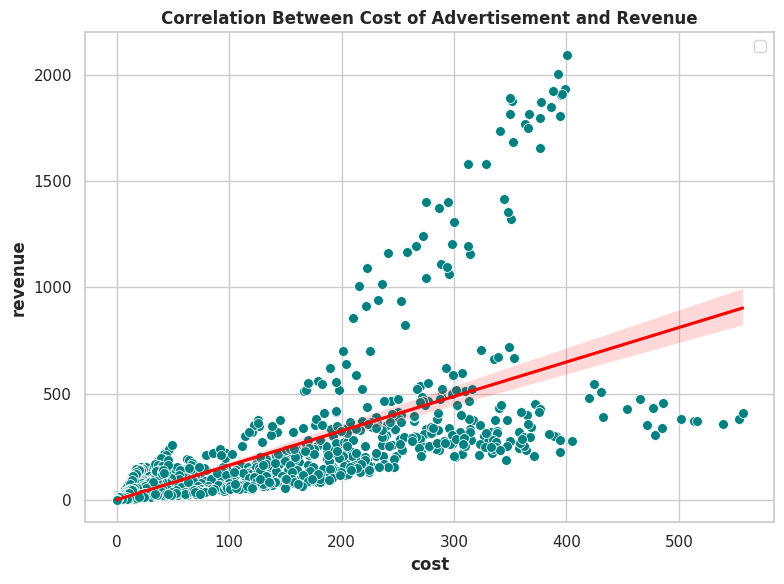

In [ ]:
import seaborn as sns

#Calculate correlation coefficient
correlation =df1['cost'].corr(df1['revenue'])
print(f"Correlation between cost and revenue: {correlation:.3f}")

#Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='cost', y='revenue', color='teal', s=50)
plt.title('Correlation Between Cost of Advertisement and Revenue',fontweight='bold')
plt.xlabel('Ad Cost (USD)',fontweight='bold')
plt.ylabel('Revenue Generated (USD)',fontweight='bold')
plt.grid(True)

# plots data and a linear regression model fit
sns.regplot(data=df1, x='cost', y='revenue', scatter=False, color='red', line_kws={'label':"Trend line"})

plt.legend()
plt.tight_layout()
plt.show()


# 5.	What is the average revenue generated per click for Company X during the campaign period?

In [ ]:
# Ensure no division by zero
total_clicks = df1['clicks'].sum()
total_revenue = df1['revenue'].sum()

if total_clicks > 0:
    avg_revenue_per_click = total_revenue / total_clicks
    print(f"Average Revenue per Click: {avg_revenue_per_click:.4f} USD")
else:
    print("No clicks recorded, cannot compute average revenue per click.")


Average Revenue per Click: 0.1108 USD


# 6. Which campaigns had the highest post-click conversion rates?

In [ ]:
# Group by campaign and sum clicks and post-click conversions
campaign_stats = df1.groupby('campaign_number')[['clicks', 'post_click_conversions']].sum()

#Post-Click Conversion Rate
campaign_stats['conversion_rate'] = (campaign_stats['post_click_conversions'] / campaign_stats['clicks'])*100

# Sort in descending order of conversion rate
top_campaigns_by_conversion = campaign_stats.sort_values('conversion_rate', ascending=False)
top_campaigns_by_conversion=top_campaigns_by_conversion.round(2).astype(str) + ' %'

top_campaigns_by_conversion[['conversion_rate']].style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])

,conversion_rate
campaign_number,
1,44.93 %
3,2.43 %
2,1.56 %


# 7.	Are there any specific trends or patterns in post-click sales amounts over time?

maximum post_click_sales_amount is  0.199930318 million USD


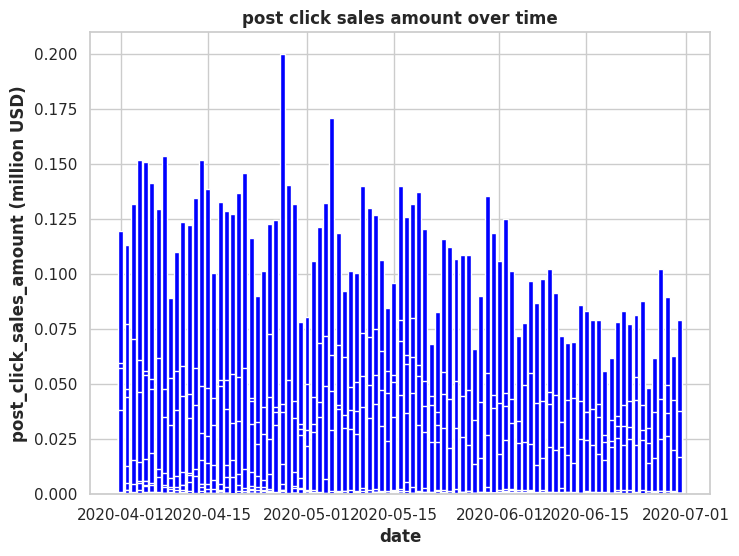

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(x=df1['date'], height=df1['post_click_sales_amount']/1e6, color='blue')
print(f"maximum post_click_sales_amount is ",df1['post_click_sales_amount'].max()/1e6,"million USD")
plt.title('post click sales amount over time',fontweight='bold')
plt.xlabel('date',fontweight='bold')
plt.ylabel('post_click_sales_amount (million USD)',fontweight='bold')
plt.grid(True)

Date wise plotting is not that effective to see a clear trend over the campaign period. we switch to weekly data plotting to observe the trend better.

The peak sales week was 2020-05-11 with sales amount of $3.13 million.


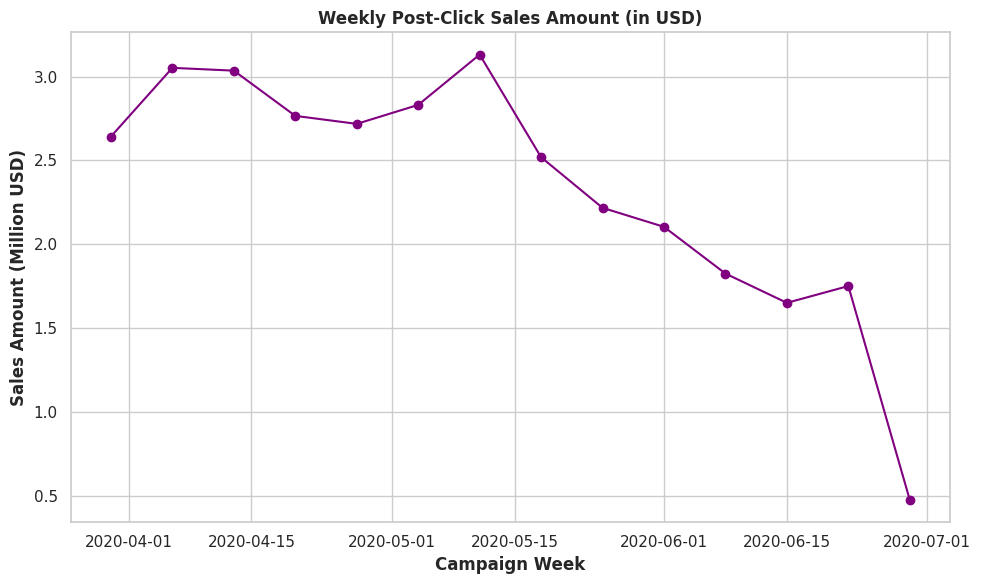

In [ ]:
# Group sales amount by week
weekly_sales = df1.groupby(df1['date'].dt.to_period('W'))['post_click_sales_amount'].sum()
weekly_sales.index = weekly_sales.index.to_timestamp()

# Convert to millions
weekly_sales_million = weekly_sales / 1e6

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_million.index, weekly_sales_million.values, marker='o', linestyle='-', color='purple')
print(f"The peak sales week was {weekly_sales_million.idxmax().strftime('%Y-%m-%d')} with sales amount of ${weekly_sales_million.max():.2f} million.")
plt.title('Weekly Post-Click Sales Amount (in USD)',fontweight='bold')
plt.xlabel('Campaign Week',fontweight='bold')
plt.ylabel('Sales Amount (Million USD)',fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

A general declining post-click sales amount over time with the highest post-click sales observed on 11-may week.
Before 15th May the post click sale amount was fluctuating between 2.5 to 3.13 Million USD, post which it declined readily for the following weeks.

# 8.	How does the level of user engagement vary across different banner sizes?

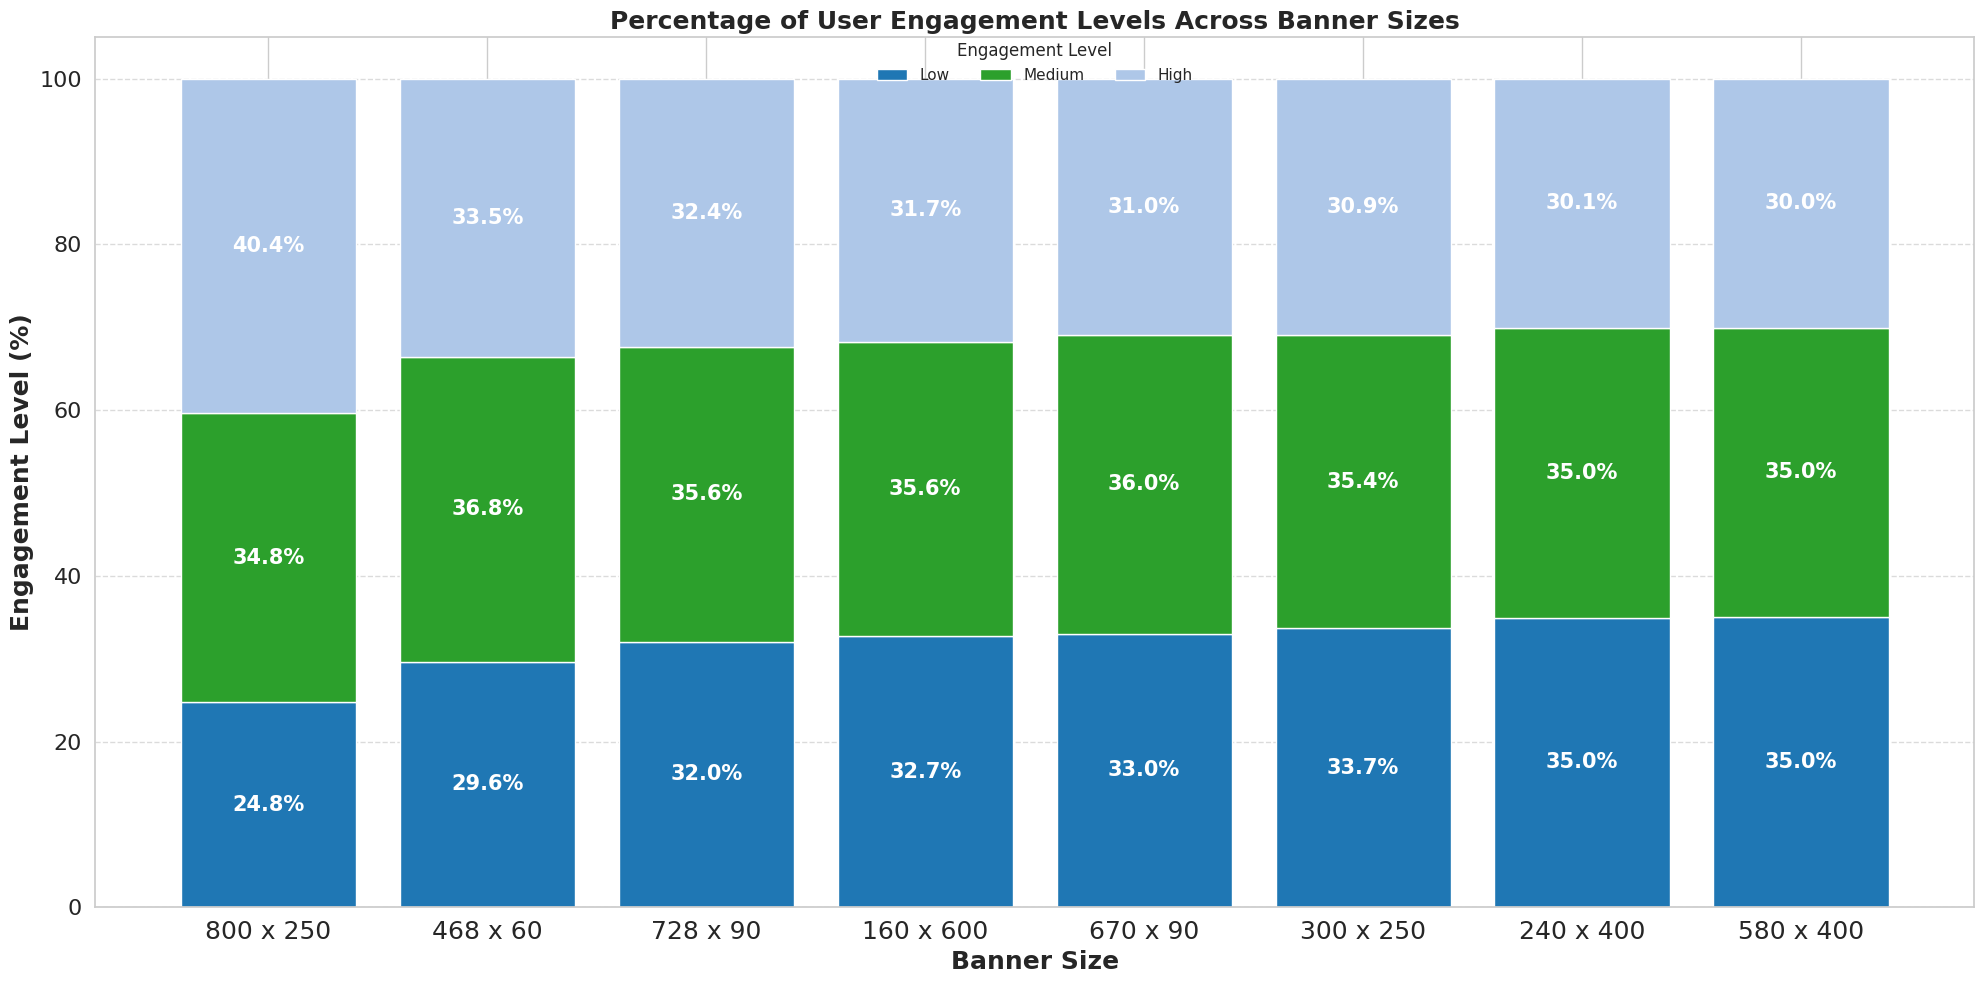

In [ ]:
#Group and count user engagement per banner
engagement_by_banner = df1.groupby(['banner', 'engagement_label']).size().unstack(fill_value=0)

#Total per banner
engagement_by_banner['total'] = engagement_by_banner.sum(axis=1)

# Normalize to percentage
engagement_levels = ['Low', 'Medium', 'High']
existing_levels = [lvl for lvl in engagement_levels if lvl in engagement_by_banner.columns]

if not existing_levels:
    print("Warning: No engagement level columns found.")
else:
    engagement_percent = engagement_by_banner[existing_levels].div(engagement_by_banner['total'], axis=0) * 100

    #sort by 'High' engagement level
    if 'High' in engagement_percent.columns:
        engagement_percent_sorted = engagement_percent.sort_values(by='High', ascending=False)
    else:
        engagement_percent_sorted = engagement_percent

    #Plot
    fig, ax = plt.subplots(figsize=(20, 10))
    bottom = [0] * len(engagement_percent_sorted)
    color_map = {
        'Low': '#1f77b4',
        'Medium': '#2ca02c',
        'High': '#aec7e8'
    }

    for level in existing_levels:
        values = engagement_percent_sorted[level].values
        bars = ax.bar(engagement_percent_sorted.index, values, bottom=bottom,
                      label=level, color=color_map[level])

        # Add percentage labels inside bars
        for bar, value, b in zip(bars, values, bottom):
            if value > 3:
                ax.text(bar.get_x() + bar.get_width()/2,
                        b + value/2,
                        f'{value:.1f}%',
                        ha='center',
                        va='center',
                        fontsize=15,
                        color='white',
                        fontweight='bold')
        bottom = [b + v for b, v in zip(bottom, values)]

    # Axis settings
    ax.set_title('Percentage of User Engagement Levels Across Banner Sizes',fontweight='bold',fontsize='18')
    ax.set_ylabel('Engagement Level (%)',fontweight='bold',fontsize='18')
    ax.set_xlabel('Banner Size',fontweight='bold',fontsize='18')
    ax.set_xticks(range(len(engagement_percent_sorted)))
    ax.set_xticklabels(engagement_percent_sorted.index, rotation=0,fontsize='18')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='y', labelsize=16)
    # Add legend in one row above plot
    ax.legend(
        title='Engagement Level',
        ncol=len(existing_levels),
        loc='upper center',
        bbox_to_anchor=(0.5, 1.01),  # shift legend up
        frameon=False
    )

    # Adjust top spacing to accommodate legend
    plt.subplots_adjust(top=1)  # slightly lower top padding to make space

    plt.tight_layout()
    plt.show()


As observed from the plot the level of user engagement wrt to the banner sizes are plotted above. With the highest engagement of 40.4% for banner size of 800x250.

# 9.	Which placement types result in the highest post-click conversion rates?

In [ ]:
# Group by placement and sum clicks and post-click conversions
placement_stats_post_click = df1.groupby('placement')[['clicks', 'post_click_conversions']].sum()

#Post-Click Conversion Rate
placement_stats_post_click ['conversion_rate'] = placement_stats_post_click ['post_click_conversions'] / placement_stats_post_click ['clicks']

# Sort in descending order of conversion rate
top_placements_by_conversion = placement_stats_post_click .sort_values('conversion_rate', ascending=False)

# Display top 5 placements by conversion rate
top_placement_name = top_placements_by_conversion['conversion_rate'].idxmax()
top_conversion_rate = top_placements_by_conversion['conversion_rate'].max() * 100

print(f"Top Placement Type is '{top_placement_name}' with Post-Click Conversion Rate: {top_conversion_rate:.2f}%")
top_placements_by_conversion=top_placements_by_conversion[['conversion_rate']].round(2).astype(str) + ' %'

top_placements_by_conversion[['conversion_rate']].style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])

Top Placement Type is 'abc' with Post-Click Conversion Rate: 52.02%


,conversion_rate
placement,
abc,0.52 %
jkl,0.28 %
ghi,0.27 %
mno,0.27 %
def,0.17 %


# 10.	Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

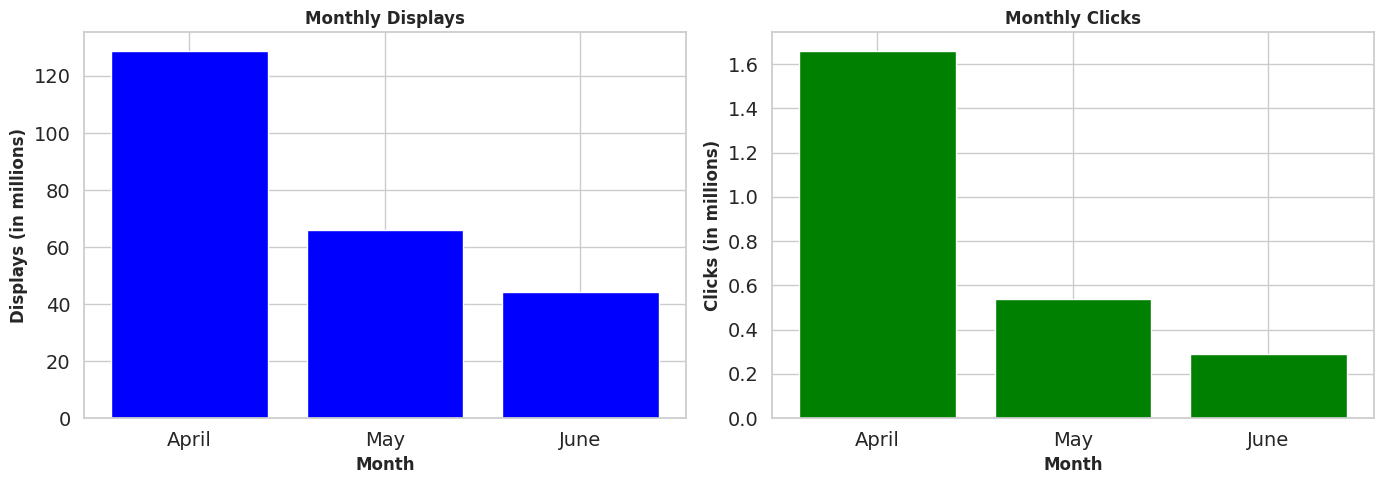

In [ ]:
# Group by month
monthly_stats = df1.groupby(df1['date'].dt.month)[['displays', 'clicks']].sum()
# Replace numeric months with names
# Replace numeric months with names
month_names = {4: 'April', 5: 'May', 6: 'June'}
monthly_stats.index = monthly_stats.index.map(month_names)
# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot Displays
axs[0].bar(x=monthly_stats.index, height=monthly_stats['displays']/1e6, color='blue')
axs[0].set_title('Monthly Displays',fontweight="bold")
axs[0].set_xlabel('Month',fontweight="bold")
axs[0].set_ylabel('Displays (in millions)',fontweight="bold")
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=0,labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
# Plot Clicks
axs[1].bar(x=monthly_stats.index, height=monthly_stats['clicks']/1e6,color='green')
axs[1].set_title('Monthly Clicks',fontweight="bold")
axs[1].set_xlabel('Month',fontweight="bold")
axs[1].set_ylabel('Clicks (in millions)',fontweight="bold")
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=0,labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()


1. The seasonal pattern (month wise), shows decrease in clicks and  displays.
2. The lowest engagement reported in June.
3. The clicks falling below ~50% of the clicks in april.

# 11.	Is there a correlation between user engagement levels and the revenue generated?

In [ ]:
correlation_calculation = df1['user_engagement'].corr(df1['revenue'])
print(f"Correlation between User Engagement and Revenue: {correlation_calculation:.2f}")

Correlation between User Engagement and Revenue: 0.18


<Axes: >

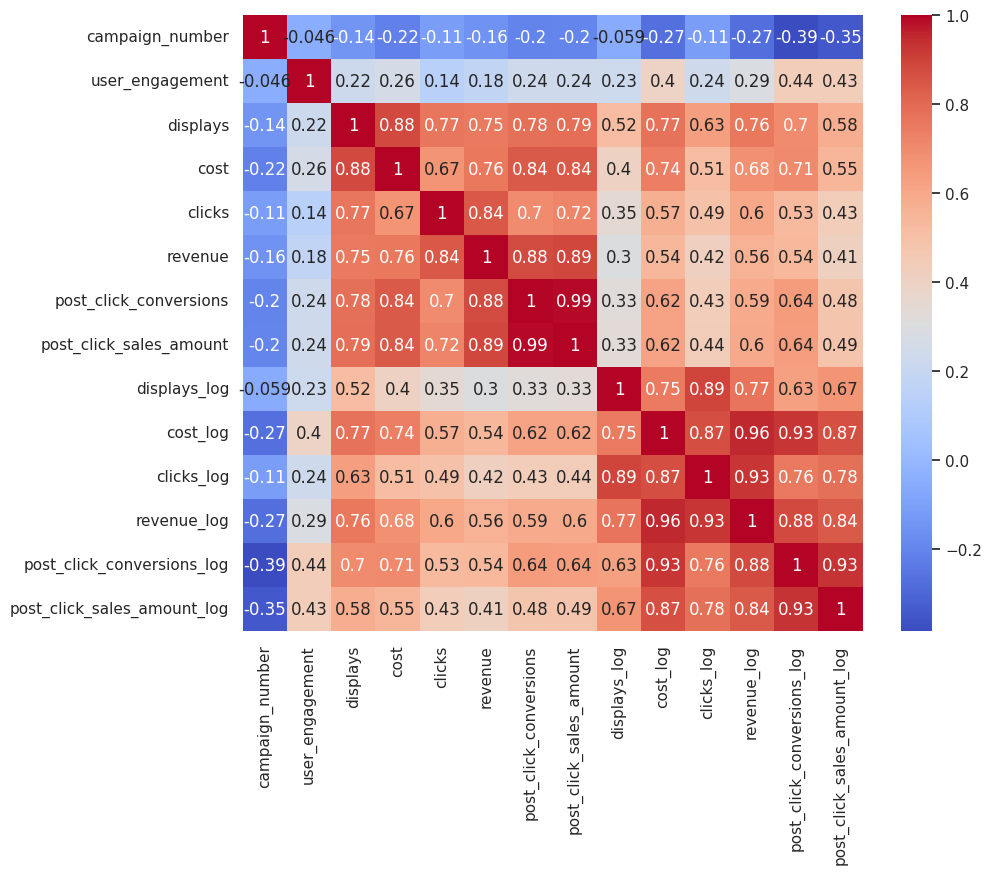

In [ ]:
plt.figure(figsize=(10,8))
# Calculate the correlation matrix, considering only numeric columns
correlation_matrix = df1.corr(numeric_only=True)

# Plot the heatmap using the correlation matrix of only numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

we also plot the user_engagement level with Revenue

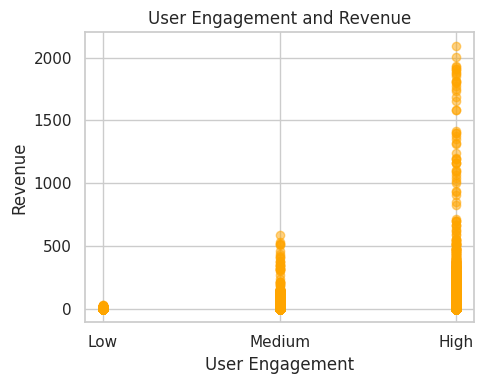

In [ ]:
# Map numeric engagement levels to categories
engagement_map = {1: 'Low', 2: 'Medium', 3: 'High'}
df1['engagement_label'] = df1['user_engagement'].map(engagement_map)

plt.figure(figsize=(5, 4))
plt.scatter(df['user_engagement'], df['revenue'], alpha=0.5, color='orange', label='Data points')
# Replace x-ticks with labels
plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
# Titles and labels
plt.title('User Engagement and Revenue')
plt.xlabel('User Engagement')
plt.ylabel('Revenue')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

we observe that higher revenue accompanies higher engagement, while lower revenue has lower user engagement

# 12.	Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

Visualizing Box plot

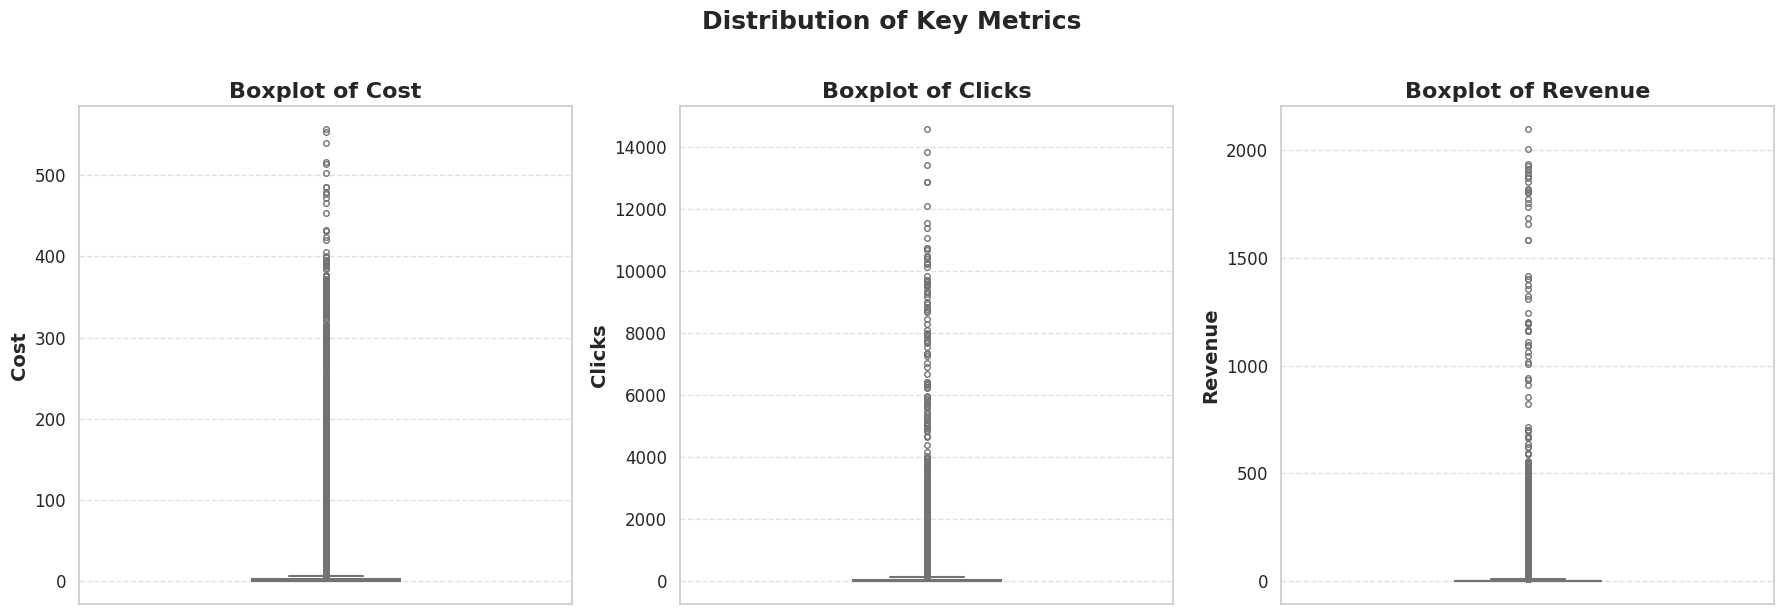

In [ ]:
# Set seaborn style
sns.set(style='whitegrid', palette='pastel')
# Columns to plot
cols = ['cost', 'clicks', 'revenue']

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Create subplots
for i, col in enumerate(cols):
    sns.boxplot(
        y=df1[col],
        ax=axes[i],
        color='lightskyblue',
        width=0.3,
        fliersize=4,  # smaller outlier dots
        linewidth=1.5
    )
    axes[i].set_title(f'Boxplot of {col.capitalize()}', fontsize=16, fontweight='bold')
    axes[i].set_ylabel(col.capitalize(), fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_xlabel("")  # No x-label

# Add overall title if desired
fig.suptitle("Distribution of Key Metrics", fontsize=18, fontweight='bold', y=1.02)

# Adjust spacing
plt.tight_layout()
plt.show()


The data is extremely compressed with large number of outliers.
In advertising this data can be a sensitive group of points where one can analyse which campaigns or days had either no clicks or revenue or very high revenue inorder to analyse advertising srategies to avoid or consider in future. Hence instead of removing outliers we can consider a log scale view.

In [ ]:
df1.columns

Index(['date', 'campaign_number', 'user_engagement', 'banner', 'placement',
       'displays', 'cost', 'clicks', 'revenue', 'post_click_conversions',
       'post_click_sales_amount', 'displays_log', 'cost_log', 'clicks_log',
       'revenue_log', 'post_click_conversions_log',
       'post_click_sales_amount_log', 'engagement_label'],
      dtype='object')

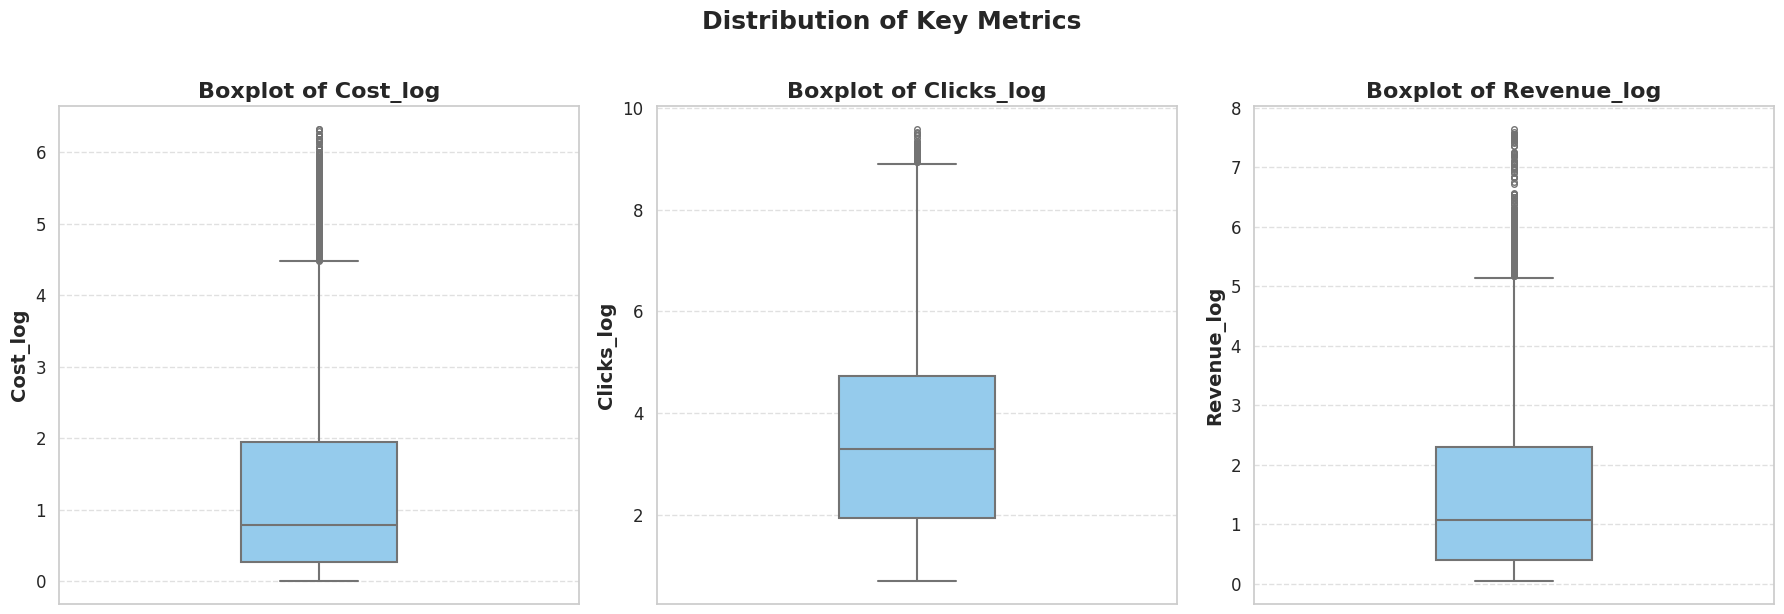

In [ ]:
# Set seaborn style
sns.set(style='whitegrid', palette='pastel')
# Columns to plot
cols = ['cost_log', 'clicks_log', 'revenue_log']

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Create subplots
for i, col in enumerate(cols):
    sns.boxplot(
        y=df1[col],
        ax=axes[i],
        color='lightskyblue',
        width=0.3,
        fliersize=4,  # smaller outlier dots
        linewidth=1.5
    )
    axes[i].set_title(f'Boxplot of {col.capitalize()}', fontsize=16, fontweight='bold')
    axes[i].set_ylabel(col.capitalize(), fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_xlabel("")  # No x-label

# Add overall title if desired
fig.suptitle("Distribution of Key Metrics", fontsize=18, fontweight='bold', y=1.02)

# Adjust spacing
plt.tight_layout()
plt.show()


In [ ]:
# List of columns to check
cols = ['cost_log', 'clicks_log', 'revenue_log']

# Dictionary to store outlier counts
outlier_counts = {}

# Loop over each column
for col in cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

    # Store count
    outlier_counts[col] = len(outliers)

    print(f"Outliers in '{col}': {len(outliers)}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}\n")


Outliers in 'cost_log': 560
Lower bound: -2.26, Upper bound: 4.48

Outliers in 'clicks_log': 48
Lower bound: -2.24, Upper bound: 8.92

Outliers in 'revenue_log': 366
Lower bound: -2.47, Upper bound: 5.17



1. Number of outliers in cost_log = 560
2. Number of outliers in clicks_log = 48
3. Number of outliers in revenue_log = 366

In [ ]:
# List of log-transformed columns to clean
log_cols = ['cost_log', 'clicks_log', 'revenue_log']

# Create a clean copy of the DataFrame
df_cleaned = df1.copy()

# Loop to remove outliers for each column
for col in log_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    print(f"Removed outliers from '{col}': bounds [{lower_bound:.2f}, {upper_bound:.2f}]")

# Final cleaned DataFrame: df_cleaned
print(f"\n Remaining rows after outlier removal: {df_cleaned.shape[0]}")


Removed outliers from 'cost_log': bounds [-2.26, 4.48]
Removed outliers from 'clicks_log': bounds [-2.24, 8.51]
Removed outliers from 'revenue_log': bounds [-2.15, 4.55]

 Remaining rows after outlier removal: 9598


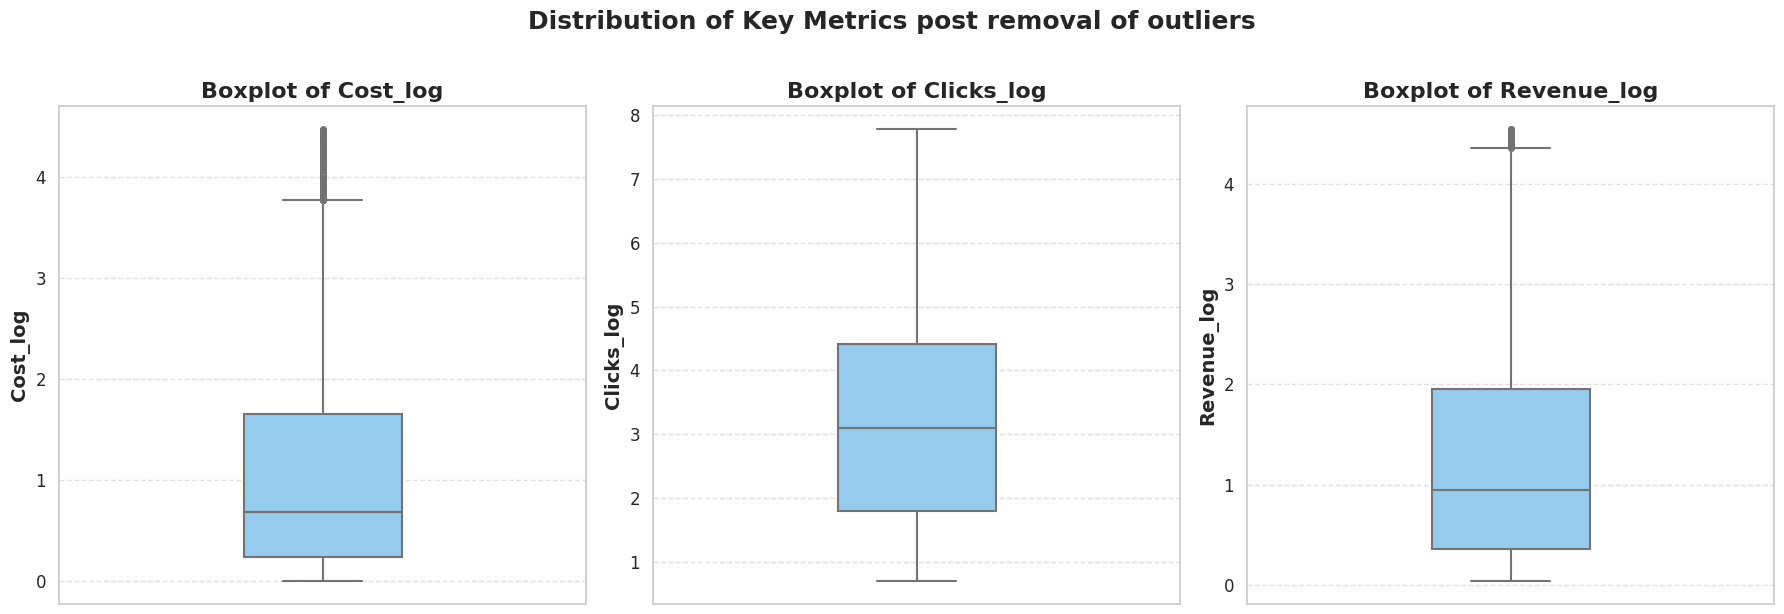

In [ ]:
# Set seaborn style
sns.set(style='whitegrid', palette='pastel')
# Columns to plot
cols = ['cost_log', 'clicks_log', 'revenue_log']

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Create subplots
for i, col in enumerate(cols):
    sns.boxplot(
        y=df_cleaned[col],
        ax=axes[i],
        color='lightskyblue',
        width=0.3,
        fliersize=4,  # smaller outlier dots
        linewidth=1.5
    )
    axes[i].set_title(f'Boxplot of {col.capitalize()}', fontsize=16, fontweight='bold')
    axes[i].set_ylabel(col.capitalize(), fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_xlabel("")  # No x-label

# Add overall title if desired
fig.suptitle("Distribution of Key Metrics post removal of outliers", fontsize=18, fontweight='bold', y=1.02)

# Adjust spacing
plt.tight_layout()
plt.show()


# 13.	How does the effectiveness of campaigns vary based on the size of the ad and placement type?

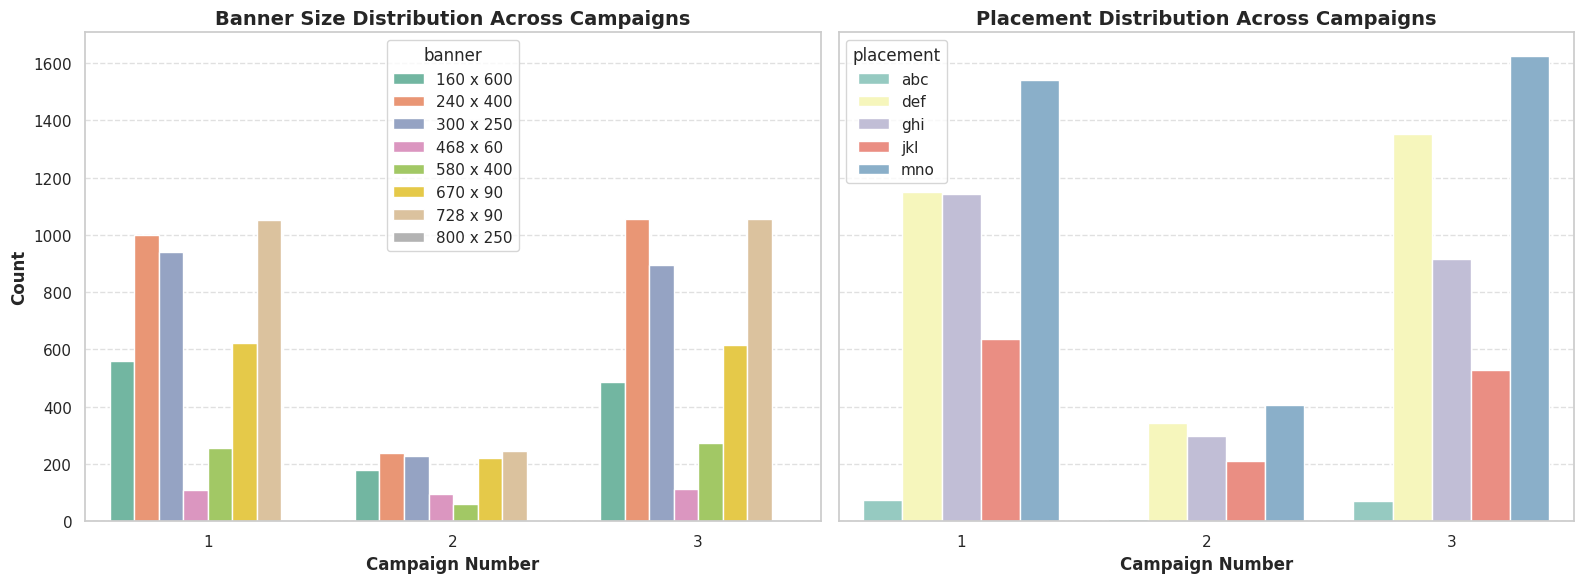

In [ ]:
# Grouped data
conversion_by_campaign_size = df1.groupby(['campaign_number', 'banner']).size().reset_index(name='count')
conversion_by_campaign_placement = df1.groupby(['campaign_number', 'placement']).size().reset_index(name='count')

# Set up the figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Plot 1: Banner Size ---
sns.barplot(
    data=conversion_by_campaign_size,
    x='campaign_number',
    y='count',
    hue='banner',
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title('Banner Size Distribution Across Campaigns', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Campaign Number', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', labelrotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Plot 2: Placement ---
sns.barplot(
    data=conversion_by_campaign_placement,
    x='campaign_number',
    y='count',
    hue='placement',
    palette='Set3',
    ax=axes[1]
)
axes[1].set_title('Placement Distribution Across Campaigns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Campaign Number', fontsize=12, fontweight='bold')
axes[1].set_ylabel('', fontsize=12)
axes[1].tick_params(axis='x', labelrotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()


* Banner size effectiveness:
1. Banner sizes like 240×400 and 580×400 were used more frequently across all campaigns, indicating they might be preferred for their performance or visual appeal.

2. Campaigns 1 and 3 show consistently high usage of these banner sizes, suggesting they contribute positively to engagement.

3. Smaller or uncommon sizes (like 468×60 and 800×250) have limited use, implying lower effectiveness or niche targeting.

* Placement Type Effectiveness
1.Certain placements like ‘mno’ and ‘def’ dominate Campaigns 1 and 3, which may correlate with higher conversions or reach.

2. Placement 'mno' especially stands out in Campaign 3, indicating high effectiveness in that campaign.

3. Campaign 2 shows significantly lower activity across placements, suggesting it may have had lower overall engagement or a smaller target scope.

# 14.	Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

In [ ]:
df1['ROAS'] = df1['revenue'] / df1['cost'] # as previously defined
roi_group = df1.groupby(['campaign_number', 'banner'])['ROAS'].size().reset_index()
top_roi = roi_group.sort_values(by='ROAS', ascending=False)
top_roi = top_roi.head(10)
top_roi.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,campaign_number,banner,ROAS
17,3,240 x 400,1054
22,3,728 x 90,1054
6,1,728 x 90,1052
1,1,240 x 400,1001
2,1,300 x 250,940
18,3,300 x 250,895
5,1,670 x 90,622
21,3,670 x 90,614
0,1,160 x 600,560
16,3,160 x 600,487


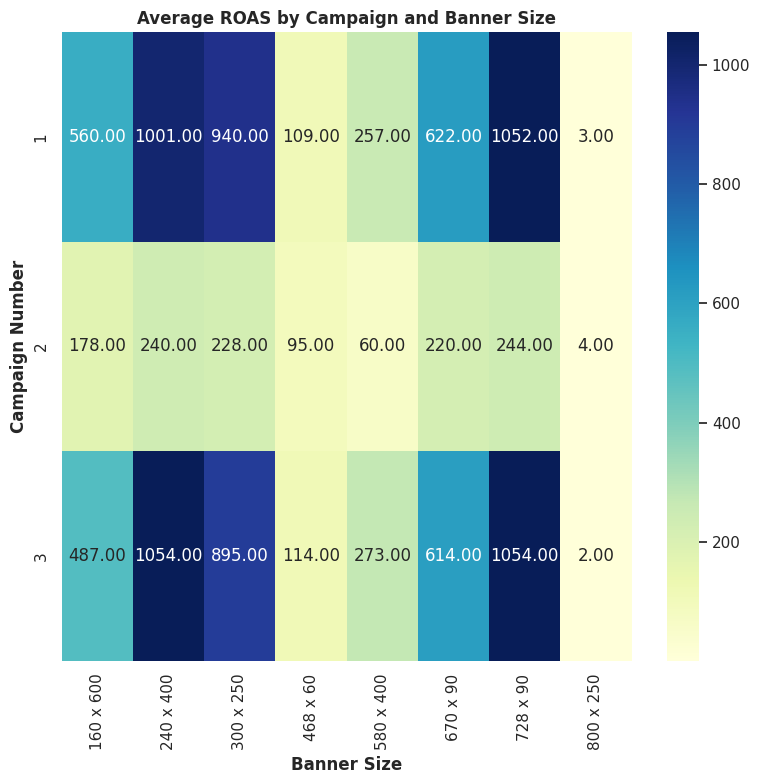

In [ ]:
# Plotting
pivot_roi = roi_group.pivot(index='campaign_number', columns='banner', values='ROAS')
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_roi, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Average ROAS by Campaign and Banner Size",fontweight='bold')
plt.xlabel("Banner Size",fontweight='bold')
plt.ylabel("Campaign Number",fontweight='bold')
plt.tight_layout()
plt.show()

Banner size 728x90(Campaign 1 and 3) and 240x400(Campaign 3) clearly outperforms all other campaigns or banner sizes

# 15.	What is the distribution of post-click conversions across different placement types?

In [ ]:
conversion_by_placement = df1.groupby('placement')['post_click_conversions'].sum().reset_index()
conversion_by_placement = conversion_by_placement.sort_values(by='post_click_conversions', ascending=False)
conversion_by_placement.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,placement,post_click_conversions
2,ghi,336981
4,mno,262998
1,def,29766
3,jkl,20697
0,abc,766


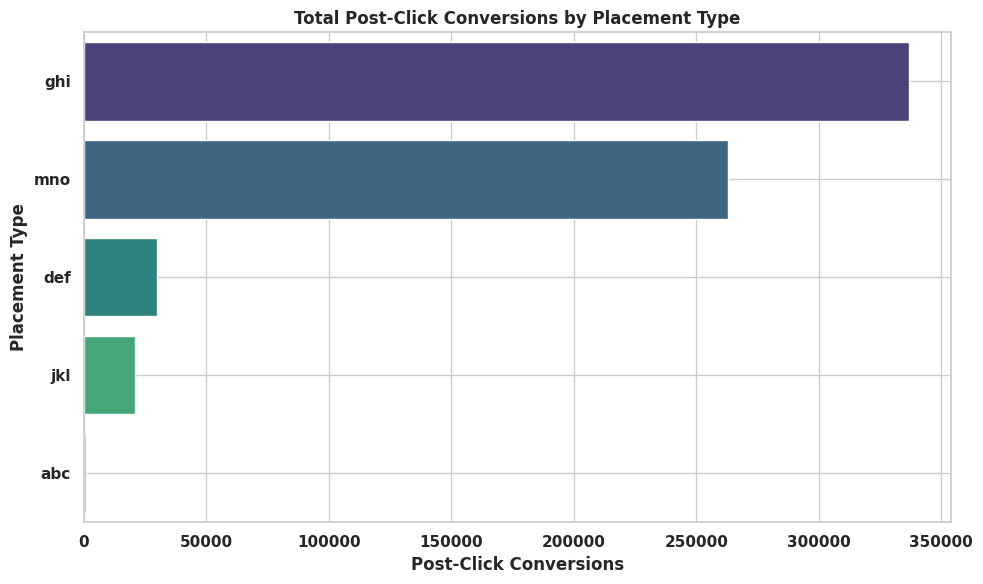

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=conversion_by_placement,
    x='post_click_conversions',
    y='placement',
    hue='placement',
    palette='viridis',
    legend=False  # disable legend since hue is same as y
)
plt.title('Total Post-Click Conversions by Placement Type',fontweight='bold')
plt.xlabel('Post-Click Conversions',fontweight='bold')
plt.ylabel('Placement Type',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()




Highest total post click conversion observed in placement "ghi"

# 16.	Are there any noticeable differences in user engagement levels between weekdays and weekends?

In [ ]:

df1['day_of_week'] = df1['date'].dt.day_name()
df1['day_type'] = df1['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
engagement_by_daytype = df1.groupby('day_type')['user_engagement'].size().reset_index()
engagement_by_daytype.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])

,day_type,user_engagement
0,Weekday,7322
1,Weekend,2984


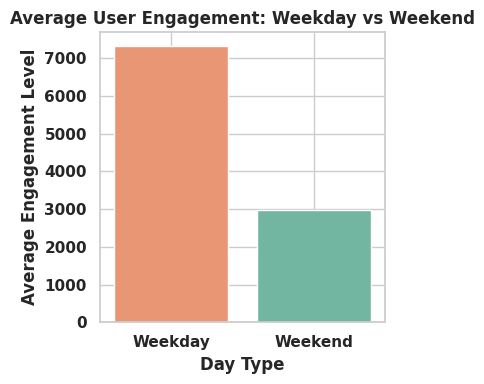

In [ ]:
plt.figure(figsize=(4, 4))
sns.barplot(data=engagement_by_daytype, x='day_type', y='user_engagement',hue='user_engagement', palette='Set2',legend=False)
plt.title('Average User Engagement: Weekday vs Weekend',fontweight='bold')
plt.ylabel('Average Engagement Level',fontweight='bold')
plt.xlabel('Day Type',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

# 17.	How does the cost per click (CPC) vary across different campaigns and banner sizes?

In [ ]:
df1['CPC']= df1['cost']/df1['clicks']
cpc_campaign_banner = df1.groupby(['campaign_number', 'banner'])['CPC'].size().reset_index()
cpc_campaign_banner = cpc_campaign_banner.sort_values(by='CPC', ascending=False)
cpc_campaign_banner=cpc_campaign_banner.head(30)
cpc_campaign_banner.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])

,campaign_number,banner,CPC
17,3,240 x 400,1054
22,3,728 x 90,1054
6,1,728 x 90,1052
1,1,240 x 400,1001
2,1,300 x 250,940
18,3,300 x 250,895
5,1,670 x 90,622
21,3,670 x 90,614
0,1,160 x 600,560
16,3,160 x 600,487


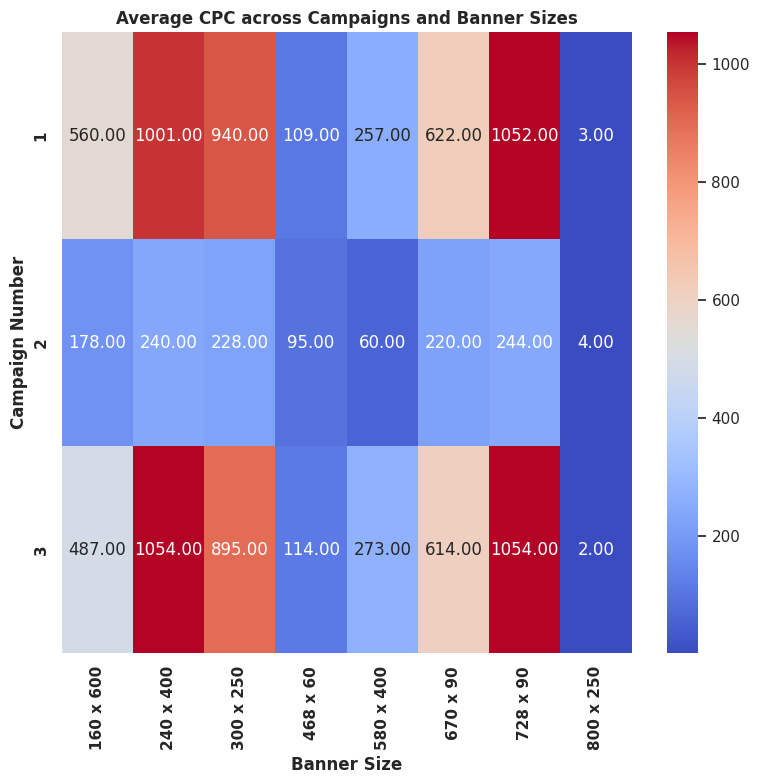

In [ ]:
cpc_pivot = cpc_campaign_banner.pivot(index='campaign_number', columns='banner', values='CPC')

plt.figure(figsize=(8, 8))
sns.heatmap(cpc_pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average CPC across Campaigns and Banner Sizes',fontweight='bold')
plt.xlabel('Banner Size',fontweight='bold')
plt.ylabel('Campaign Number',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


1. Banner size 728x90 (Campaign 1 and 3) and 240x400 (Campaign 3) have the highest cost per click.
2. Noticeable, larger banners have high cost per click for both campaign 1 and 3.
3. The largest banners foe all campaigns donot fall under the high CPC list.
4. None of the campaign 2 banners make it to the high cost per click value list.
5. Banners with a low to medium height and width also have high CPC for campaign 1 and 3.


# 18.	Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

In [ ]:
# Calculate cppcc (cost per post-click conversion)
df1['cppcc'] = df1['cost'] / df1['post_click_conversions']
# Remove rows with zero conversions to avoid division by zero
df_filtered = df1[df1['post_click_conversions'] > 0].copy()
# Group by campaign and placement, calculate mean cppcc
cost_effective_campaign_placement = (
    df_filtered.groupby(['campaign_number', 'placement'])['cppcc']
    .mean()
    .reset_index()
    .sort_values(by='cppcc', ascending=False)  # ascending: most cost-effective first
)

# Show top 10 most cost-effective
cost_effective_campaign_placement=cost_effective_campaign_placement.head(10)
cost_effective_campaign_placement.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,campaign_number,placement,cppcc
13,3,mno,1.759456
6,2,ghi,1.647937
5,2,def,1.598899
11,3,ghi,1.591719
8,2,mno,1.552726
7,2,jkl,1.140003
12,3,jkl,0.976729
10,3,def,0.873166
1,1,def,0.591842
4,1,mno,0.478068


The "mno" placement for campaign 3 is the most cost effective with highest post click conversions

# 19.	Can we identify any trends or patterns in post-click conversion rates based on the day of the week

In [ ]:
df1['day_of_week'] = df1['date'].dt.day_name()
df_filtered = df1[df1['clicks'] > 0].copy()
df_filtered['pccr'] = df_filtered['post_click_conversions'] / df_filtered['clicks']
post_click_conversion_by_daytype = df_filtered.groupby('day_of_week')['pccr'].size().reset_index().sort_values(by='pccr', ascending=False)
post_click_conversion_by_daytype=post_click_conversion_by_daytype.head(7)
post_click_conversion_by_daytype.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])

,day_of_week,pccr
2,Saturday,1505
6,Wednesday,1505
1,Monday,1480
3,Sunday,1479
5,Tuesday,1459
4,Thursday,1443
0,Friday,1435


Highest post click conversions occur on wednesdays and saturdays, with least on fridays

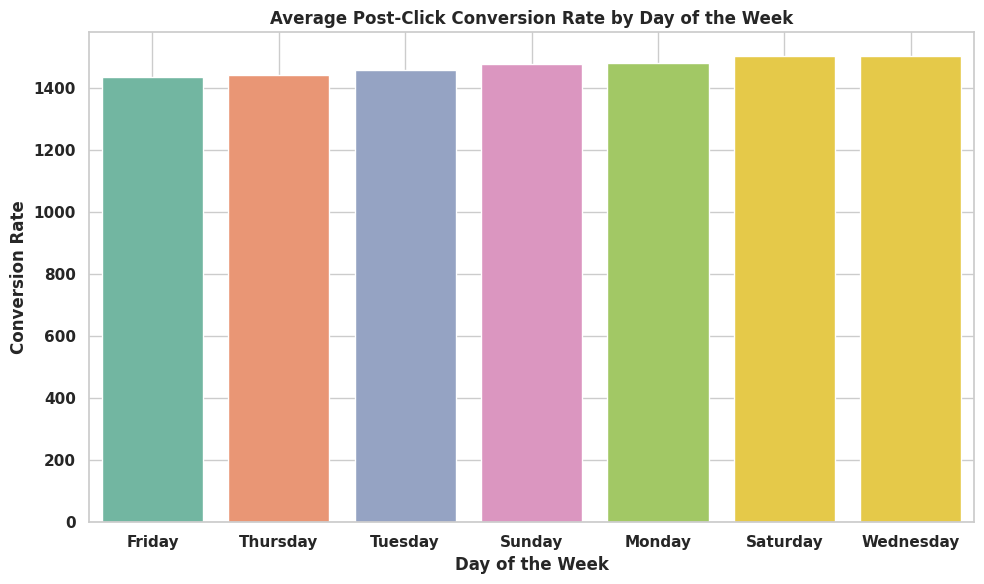

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=post_click_conversion_by_daytype, x='day_of_week', y='pccr',hue='pccr', palette='Set2',legend=False)
plt.title('Average Post-Click Conversion Rate by Day of the Week',fontweight='bold')
plt.xlabel('Day of the Week',fontweight='bold')
plt.ylabel('Conversion Rate',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

# 20.	How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

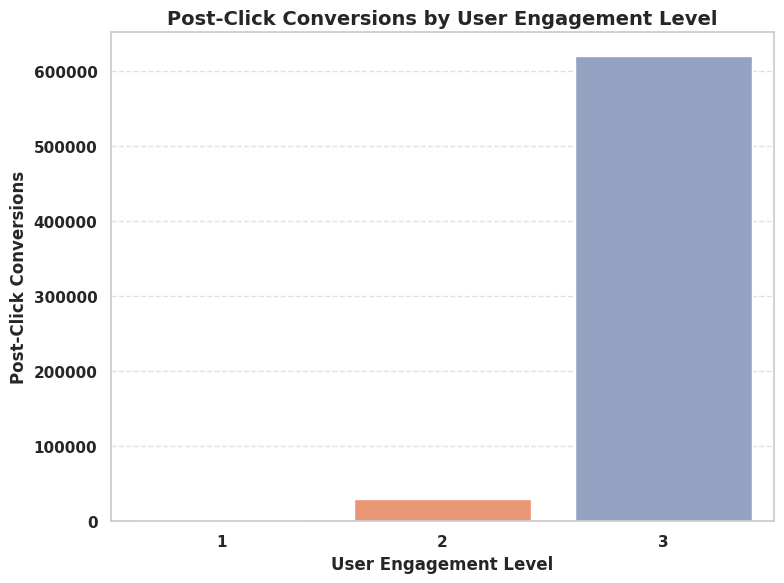

In [ ]:
# Group by numeric user engagement and sum post-click conversions
conversion_by_engagement = df1.groupby('user_engagement')['post_click_conversions'].sum().reset_index()

# Sort numerically (1 → 2 → 3)
conversion_by_engagement = conversion_by_engagement.sort_values('user_engagement')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=conversion_by_engagement,
    x='user_engagement',
    y='post_click_conversions',
    hue='user_engagement',  # gives distinct color per level
    palette='Set2',
    legend=False
)

plt.title('Post-Click Conversions by User Engagement Level', fontsize=14, fontweight='bold')
plt.xlabel('User Engagement Level', fontsize=12, fontweight='bold')
plt.ylabel('Post-Click Conversions', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


1. high engagement users (Level 3) contribute to majority of post-click conversions, indicating they are the most valuable audience for campaign success.

2. Medium engagement users (Level 2) have moderate conversions, showing potential with tailored messaging or remarketing strategies.

3. Low engagement users (Level 1) contribute negligible or no conversions, suggesting low ROI and minimal campaign effectiveness in this segment.